### Function to Approximate 
 $$ f_1(x) = 2x,  \hspace{10 mm}     [0, 3] $$
 $$ f_2(x) = 2x,  \hspace{10 mm}     [-3, 3] $$


In [26]:
import matplotlib.pyplot as plt
import math
import numpy as np
from time import time

plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
pi = math.pi
linestyles=['solid', 'dashed', 'dashdot', 'dotted']
colors = ['r', 'b', 'k']

 ###  Python Functions Used for Fourier Analysis 
 Vectorize $a_n$ and $b_n$ functions for $f_1(x)$

In [27]:
def a_n(n):
    try:
        a = 0
    except ZeroDivisionError:
        a = 0
    return a

def b_n(n):
    b = ((-12)*(-1)**(n))/(n*pi)
    return b 

def fourier(a_coeff, b_coeff, x_input, interval_length, a_0=0, ):
    
    total = 0
    y_output = np.zeros(x_input.shape[0])
    coefficient_size = len(a_coeff)

    for counter, x in enumerate(x_input):
        # print('counter is:', counter, '\nx is: ', x, )

        for i in range(coefficient_size):
            total += a_coeff[i] * math.cos( ((i + 1) * x  * pi) / interval_length) + b_coeff[i] * math.sin( ((i + 1) * x * pi) / interval_length)
            
        y_output[counter] = (a_0/2) + total
        total = 0  # rest total
    return y_output

vector_a = np.vectorize(a_n)
vector_b = np.vectorize(b_n)

### Pure Analytic Function 

In [28]:
def f_1(x):  
    f = 2*x
    return f
f_x = np.vectorize(f_1)

 Define constants and $x$-domain space for   $$ f(x) = 2x,  \hspace{10 mm}     [-3, 3] $$

In [40]:
interval_length = 3
a_0 = a_n(0)

x_start = -3
x_end = 3


x_domain = np.linspace(x_start, x_end, 1001)  # iterated x_domain from 0 to 2 
f_1_return = f_x(x_domain)

x_domain_zero_to_3 = np.linspace(0, x_end, 1001)

coefficients_to_plot = [50]  # number terms in Fourier Series

## Fourier Approximate and Function Plot 
 $$ f_1(x) = 2x,  \hspace{10 mm}     [0, 3] $$
 $$ f_2(x) = 2x,  \hspace{10 mm}     [-3, 3] $$

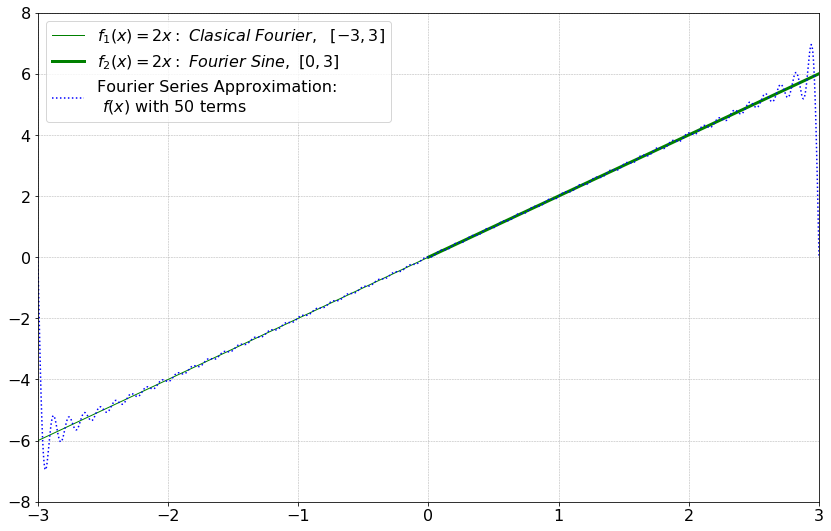

In [53]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((-8, 8))
ax.set_xlim((x_start, x_end))
ax.plot(x_domain, f_1_return, color='g',label=r'$f_1(x)=2x: \   Clasical \ Fourier, \ \ [-3, 3]$',  linewidth=1)
ax.plot(x_domain_zero_to_3, f_x(x_domain_zero_to_3), color='g',label=r'$f_2(x)=2x: \ Fourier\ Sine, \ [0, 3]$',  linewidth=3)

for i, number_of_coeff in enumerate(coefficients_to_plot):
    
    n = np.arange(1,number_of_coeff + 1, 1, dtype=np.int32)
    a = vector_a(n)  #  terms are generated
    b = vector_b(n)
    y_estimates = fourier(a, b, x_domain,interval_length ,a_0)

    ax.plot(x_domain, y_estimates, color='b', linewidth=1.5, linestyle=linestyles[i+3],label=f'Fourier Series Approximation:\n $f(x)$ with {number_of_coeff} terms'  )

ax.legend(loc=0)
ax.grid(linestyle='--', linewidth=0.5)




plt.savefig('HW6_Problem_3.pdf', bbox_inches="tight")
plt.show()